# Predicting the credit card default

In [1]:
 cd C:\Users\sharv\Desktop\Data

C:\Users\sharv\Desktop\Data


Default in terms of banking means whether a person will miss the next payment or not.This payment maybe related to loan, credit card etc.Defaults occur when a borrower stops making the  required payment on debts.It negatively impacts the ability to borrow money from banks

# Dataset description

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Kaggle DATA:

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)


AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

## Goal:Finding out what is the chance of a particular customer getting defaulted out of 30,000 people.

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [9]:
y=df['default.payment.next.month'].value_counts()
y

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [10]:
import matplotlib
print(matplotlib.__version__)

3.5.2


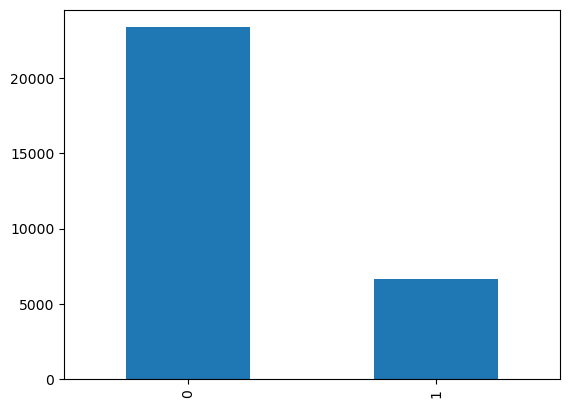

In [11]:
import matplotlib.pyplot as plt
imbal=df['default.payment.next.month'].value_counts().plot(kind='bar')

This shows that the dataset is imabalanced.
no. of customers that have default payment next mon=6636
no. of customers that  do not have default payment next mon=23364

# Dealing with class imbalance

Over sampling(same values are duplicated so if there is outlier in the row that gets duplicated as well) or upsampling can lead to overfitiing of noise.

Under sampling or down sampling can cause loss of information or underfitting.

SMOTE(Synthetic Minority Oversampling Technique) which is smart oversampling reduces the issue of overfiiting in oversampling method.SMOTE creates the closer values of the current available values for new samples that needs to be added like knn.To create new samples in smote the logic is as joining 2 points of same class from a dataset and creating new points on the lines.Thus, smote connects the lines that is joined using same feature space (same class in space) and picks the points inside the feature space.It relates to section formula in Maths that says if you have a line between 2 pts you can choose the points on the line. that connects the feature space.So in smote you are not getting the exact same pts as it does in oversampling.Here the points are similar to the nearest neighbours and there is low probability of overfitting and the values selected are close to real values.Smote can be only used when you have a separable data. When the values of the data in different classess say dots and crossess are very close and dense smote does not perform well.It is important to scale the variables before using smote as it is a distance based formula.

There is a better way instead of using downsampling as well.We can use smart down sampling in which instead of randomly missing out the rows from dataset, we will cluster them in majority class.Then the cluster center of the clusters are calculated and then instead of keeping any of the individual rows you keep than cluster center.So all the attributes for cluster centers are calculated.

https://iq.opengenus.org/smote-for-imbalanced-dataset/

To be able to call a data as imbalanced there is no rule.
But data that has 35 % or less then can be said as imbalanced in case of small datasets but in larger dataset this value can be till 20 % .It is imp to note that the main idea is to give the model enough data to learn.

To decide which sampling method to use there is no rule but we can try all the methods that is over/smote and undersampling and the one that gives better accuracy is selected.

To solve all the problems most of the models apply a one vs rest approach for multiclass classification.Similarly for  imbalanced dataset with multiclass classification,create separate dataset for eg gor 3 classes 3 datasets are created and then apply the class imbalance technique. 

After EDA(missing,NaN values etc.) ,preprocessing and dataset imbalanced is checked.

# Feature Engineering

This involves p-values,hypothesis testing,feature importance matrix(for tree based models specially),RFE(recursive feature elimination).RFE is trying the elimination of different features and see how differently the model performs and select the combination of features that give best results.But RFE does not work for multicolinearity of models as it gets difficult to predict which variables perform better than the other.So for basic models(linear models,logistic regression,basic statistical models) the p-values ,hypothesis testing ,RFE (if the dataset is colinear) does not work and these tests are not valid.RFs and DT performs good in RFE.Regularization technques can also be used.

# Creating new variables/attributes

It is very specific to the problem that you deal with.Tnteraction effects are the effects that occur when 2 variables react with each other.If there is a biological information that you need to convey to model then we use this.We create a statistical interaction effect.For eg. we want to tell our model that the smokers and the gender are related when it comes to affecting due to cancer.So to tell this the data in field of smokers and gender is multiplied or create if else conditions to exactly convey ur results and a new field / variable is created/ label encoding can also be done using unique variables and while training the model this new variable is also given along with the original dataset.Polynomial features can also be used.

# How to evaluate a model for imbalanced dataset

1. Confusion matrix:  Precision,recall,f1 score.
      
     Misclassification Accuracy/Accuracy cannot be used for imbalanced dataset as we know that the underlying data is imbalanced.So you dont trust on misclassification accuracy because it can be still biased with the majority class as the imbalnced data problem is handled with up/down sampling and in  simple upsampling  we directly duplicate the values .The test data is not sampled and treated. So the accuracy does not make sense.You should always test your models on the imbalnced version and not on the balanced version of the data.

2. Mathews Corelation coefficient:ionality of the predictions. Checks the directIt is the corelation of actuals and predicted similar to r^2 in regression.Specifically for unblanaced dataset.The values betwwen the numerals of actuals and predicted is in between (-1 to 1).

MCC=0 .....AS GOOD AS COIN TOSS

MCC<0 .....YOUR MODEL IS GOING AGAINST THE ACTUALS SO IT IS LIKE WHEN IT IS 0 IT PREDICTS 1 WHICH IS VERY BAD.

MCC>0 .....GOOD MODEL AND IT IS ABLE TO LEARN THE DIRECTIONALITY OF THE ACTUALS .



Many companies also accept the MCC WITH 0.2 AND 0.4 like greater than 0 but not zero.

# Actual Implementation-EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Any algorithm that has distance based measures that is they used distance based formulas like euclidean/manhattan distance at the backend needs to be scaled or standaradized. Eg: SVM,K-MEANS,KNN.For tree based models you do not need to do it but people do it.Best strategy is to have both standardized and non standaradized versions and see which gives best results.

In [13]:
#Describing categorical variables

df[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


If there is a negative corelation between the target variable and another variable then you can directly drop those variables but it is advised to not to drop them and understand how they are related and what results you might get. As that feature alone may not be related to output but in combination with other features can affect the results positively.

In [14]:
# Bill statement description
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In bill statement description the minimum value is again -ve that doesnt make sense.May be it can be said that he has paid more money in advance but these values are huge nos and it is not possible for some to do so much advance payment.

Moreover it can be said that the data is skewed as there is huge difference between the value of mean and median(50 %).Similarly almost all the variables are skewed here.

Here the 99% and max values can be checked to see if there are outliers but to do this there should be a normal distribution and seeing the skewness in thos data we cannot say that it is normally distributed.But still if you check we are absolutely having a lot of outliers.
Now 1st step that we need to check is how many outliers are present.Because if they are 1 or 2 then you can ignore them or if they are more then we can handle it.

In [15]:
# Payment delay description
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [16]:
df[['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.0,0.0,0.0,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.0,0.0,0.0,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.0,0.0,0.0,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.0,0.0,0.0,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.0,0.0,0.0,8.0


Here the min value for all the payment is -2 which should not be there according to the data description.As the only negative value in these columns is -1 which states that the payment is done on time.Moreover the median value is 0 which is not expected according to data dictionary.
Someone before uploading the data replaced the missing values by 0. Replacing Nan to 0. Which is not good at all as we already have missed data but we have to go ahead with this and deal with them.
Describe to all the dataset becomes complex so you should always see them separately.
To solve this:
We can club all of these records in something else .Convert all -2 to 0,-1 as negative numbers here mean that the payment is done on time.

In [17]:
df['LIMIT_BAL'].describe()                 

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [18]:
def outliers_iqr(ys):
    quartile_1,quartile_3=np.percentile(ys,[25,75])
    iqr=quartile_3-quartile_1
    lower_bound=quartile_1-(iqr*1.5)
    upper_bound=quartile_3+(iqr*1.5)
    return np.where((ys>upper_bound)|(ys<lower_bound))

In [19]:
df.loc[outliers_iqr(df['BILL_AMT1'])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,18,320000.0,1,1,1,49,0,0,0,-1,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,37,280000.0,1,2,1,40,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,58,180000.0,2,2,1,34,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29921,29922,410000.0,1,1,2,34,0,0,0,-1,...,1467.0,1421.0,-15.0,17259.0,18600.0,1474.0,1428.0,0.0,0.0,1
29963,29964,610000.0,1,1,2,31,0,-1,2,-1,...,347303.0,248893.0,269528.0,323014.0,1605.0,349395.0,250144.0,271099.0,220076.0,0
29978,29979,310000.0,1,2,1,39,0,0,0,0,...,219409.0,216540.0,210675.0,10029.0,9218.0,10029.0,8049.0,8040.0,10059.0,0
29988,29989,250000.0,1,1,1,34,0,0,0,0,...,245750.0,175005.0,179687.0,65000.0,8800.0,9011.0,6000.0,7000.0,6009.0,0


So because there are 2400 data points that come as outliers you cannot eliminate them or capp them.

You cannot eliminate these values as they might be genuine values.

The algorithms that get severely impacted with outliers cannot be used like SVC as we are not eliminating them.

We will scale the data to minimize the effect of large values.So scaling the data will minimize these values.

If you have issues with the negative values in the data then we use the min max scaling to bring all the values between 0 & 1.Else standard scaling should be used.

In [20]:
#Previous payment description
df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [21]:
from collections import Counter

def detect_outliers(df,features):
    outlier_indices=[]
    for c in features:
        # 1st quantile
        Q1=np.percentile(df[c],25)
        # 3rd quantile
        Q3=np.percentile(df[c],75)
        #IQR
        IQR=Q3-Q1 
        # Outlier step
        outlier_step=IQR*1.5
        #Detect outlier and their indices
        outlier_list_col= df[(df[c] < Q1-outlier_step) | (df[c] > Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>0)
    return multiple_outliers

In [22]:
df.loc[detect_outliers(df,['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,18,320000.0,1,1,1,49,0,0,0,-1,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,37,280000.0,1,2,1,40,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,58,180000.0,2,2,1,34,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29491,29492,320000.0,1,1,2,31,1,-2,-2,-2,...,-50616.0,-53007.0,-94625.0,185.0,28.0,12.0,208.0,8.0,14.0,1
29494,29495,320000.0,1,1,2,34,0,0,0,0,...,104795.0,113156.0,121465.0,19246.0,11550.0,11688.0,12122.0,12156.0,2437.0,0
29739,29740,450000.0,1,2,1,43,0,0,0,0,...,67875.0,58328.0,252696.0,6000.0,4000.0,4000.0,7000.0,215000.0,3000.0,0
29903,29904,260000.0,1,1,1,30,-1,0,-1,-1,...,99.0,99.0,172104.0,10018.0,13333.0,99.0,99.0,172104.0,30013.0,0


If we consider all the bill amounts then it can be seen that it is almost 10 % of the data that has outliers and hence we are not eliminating them.

Even if mathematically a value comes as outlier it does not mean that it is a outlier that value might be genuine so think logically as well with respect to domain.

In [23]:
df=df.rename(columns={'default.payment.next.month':'def_pay','PAY_0':'PAY_1'})   # pay 0 is pay 1 actually when compared to others
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [24]:
df.def_pay.sum()/len(df.def_pay)

0.2212

This again proves that the dataset is imbalanced.This is because the default rate for binary classification should be 50% if the dataset is balanced here 20% shows that the classes aare imbalanced.


For the categorical varables always do a count plt to check if any of the values are under represented before doing the modelling.

<AxesSubplot:>

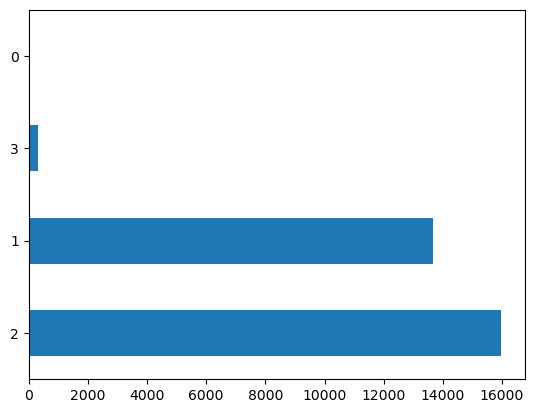

In [25]:
df.MARRIAGE.value_counts().plot(kind='barh')

Here again the marriage 3 and 0 are underrepresented and 0 was not expected according to data description.

So this 0 is present in almost all the classes which should not be here. So it indicates that it might be computational error or system change error.May be we can club it together in 1 class as 3 because it might be in others.

<AxesSubplot:>

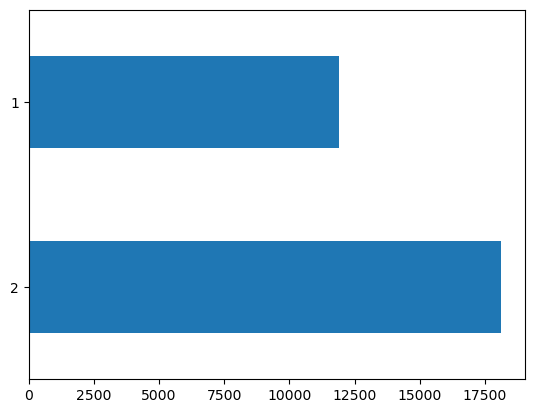

In [26]:
df.SEX.value_counts().plot(kind='barh')

Here 1 is male and 2 is female so we have more female credit card customers than male.

<AxesSubplot:>

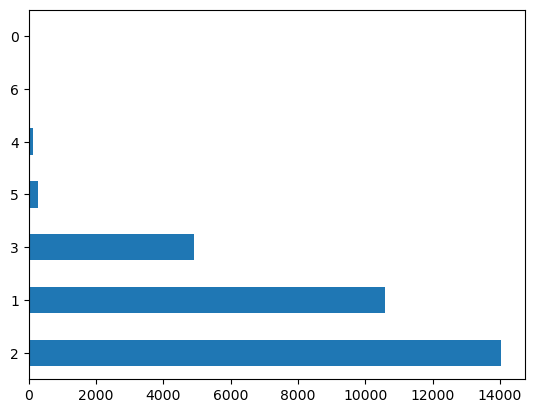

In [27]:
df.EDUCATION.value_counts().plot(kind='barh')

In [28]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here again 0 should not be there. So we can combine 4,5,6 and 0.

Histogram function is not required here but useful when we have larger datasets.

In [29]:

import matplotlib.pyplot as plt
def draw_histograms(df,variables,n_rows,n_cols,n_bins):
    fig=plt.figure()
    for i,var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()   #improves appearance a bit
    plt.show()

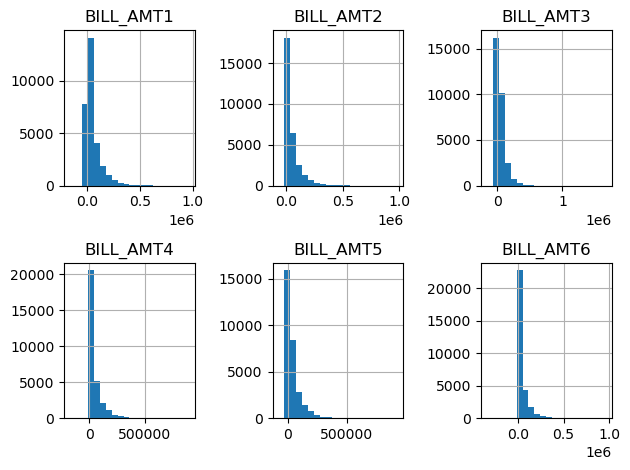

In [30]:
bills=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
draw_histograms(bills,bills.columns,2,3,20)

It shows the distribution of each column and you can check if there is fair(similar) distribution among similar columns

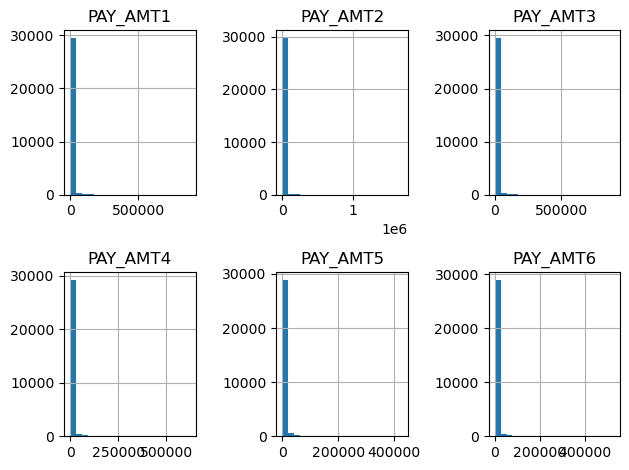

In [31]:
pay=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
draw_histograms(pay,pay.columns,2,3,20)
#plotting histograms of the data in the pay dataframe for each of the selected columns (PAY_AMT1 through PAY_AMT6), 
#using a 2x3 grid of subplots, with each subplot having a bin size of 20

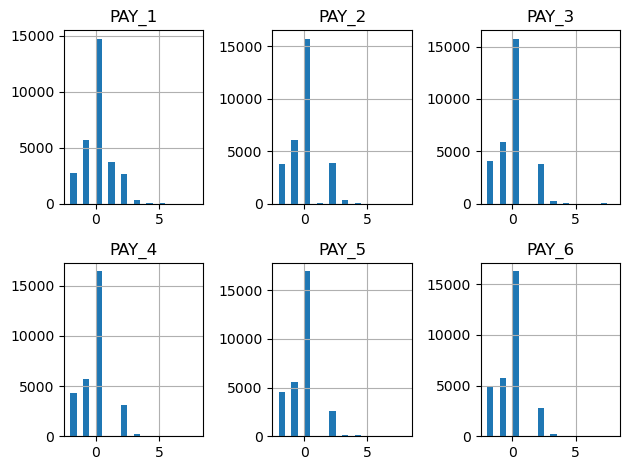

In [32]:
late=df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late,late.columns,2,3,20)

Skewed data is a term used to describe data that is not evenly distributed around the mean. In a dataset with a normal distribution, the data would be evenly distributed around the mean, with approximately half of the data points falling above the mean and half falling below.

However, in a skewed dataset, the distribution is not symmetrical, and the majority of the data points tend to cluster towards one end of the scale. There are two types of skewed data:

Positive skew: In a positively skewed dataset, the tail of the distribution is longer on the right-hand side. This means that there are more data points on the left-hand side of the mean, with a few extreme values on the right-hand side.

Negative skew: In a negatively skewed dataset, the tail of the distribution is longer on the left-hand side. This means that there are more data points on the right-hand side of the mean, with a few extreme values on the left-hand side.

Skewed data can have implications for statistical analyses and data modeling, as certain statistical tests and models assume a normal distribution of the data. Therefore, it is important to identify and understand the nature of the skewness in the data before analyzing it.

All the above histogram shows that the data is not equally districuted along the mean and hence it is skewed.There are 2 ways to solve the problem of skewness:

1.Logarithmic transformation
2.Scaling

Scaling is more advantageous than log as it makes easy to train algorithms on.

<AxesSubplot:>

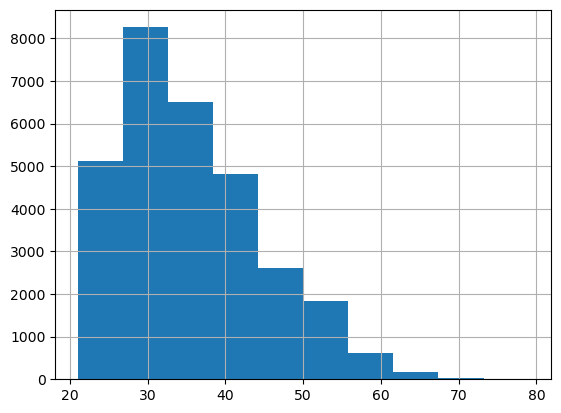

In [33]:
df.AGE.hist()

It is observed that ypung/ adults in the age 20-40 are uisng more credit card than others.

Tree based models have proven to perform better with categorical data than numeric data so we shall try to convert the numeric data to categorical form by bucketing them wherever possible.You can create a new feature by crreating the bins and like 10-20,30-40 etc, and create a categorical variable with this.So the model will understand the people in this bin are not diff and they can be treated equally as they behave similarly.you should try to keep all the columns while training.

<AxesSubplot:>

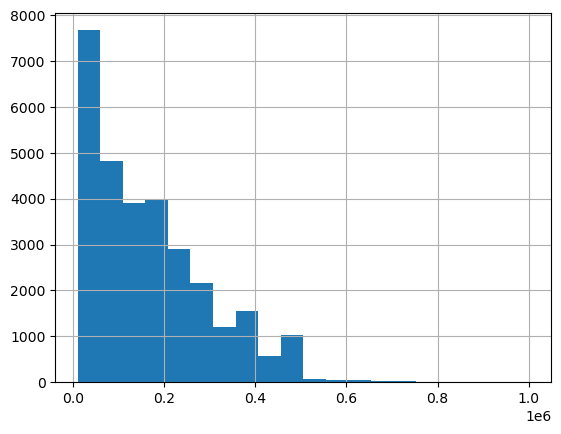

In [34]:
df.LIMIT_BAL.hist(bins=20)

# Combining columns whereever necessary 

As described before we will add values 5,6 and 0 of eduction in 4.

In [35]:
fil= (df.EDUCATION==5) | (df.EDUCATION==6) | (df.EDUCATION==0)
df.loc[fil,'EDUCATION']=4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [36]:
df.loc[df.MARRIAGE==0,'MARRIAGE']=3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

We had to convert any no that is negative or 0 to 0 in the PAY columns as they all mean that those customers pay on time.The below call does the same.

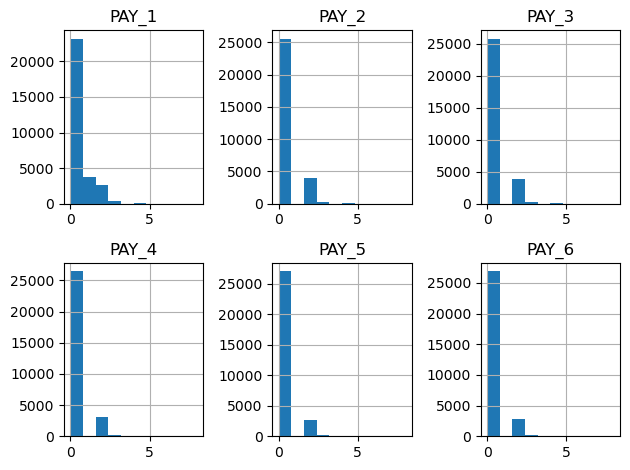

In [37]:
fil = (df.PAY_1== -2) | (df.PAY_1==-1) | (df.PAY_1==0)
df.loc[fil,'PAY_1']=0
fil = (df.PAY_2==-2) | (df.PAY_2==-1) | (df.PAY_2==0)
df.loc[fil,'PAY_2']=0
fil = (df.PAY_3==-2) | (df.PAY_3==-1) | (df.PAY_3==0)
df.loc[fil,'PAY_3']=0
fil = (df.PAY_4==-2) | (df.PAY_4==-1) | (df.PAY_4==0)
df.loc[fil,'PAY_4']=0
fil = (df.PAY_5==-2) | (df.PAY_5==-1) | (df.PAY_5==0)
df.loc[fil,'PAY_5']=0
fil = (df.PAY_6==-2) | (df.PAY_6==-1) | (df.PAY_6==0)
df.loc[fil,'PAY_6']=0
late=df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late,late.columns,2,3,10)

In [38]:
df[df.PAY_AMT1>300000][['LIMIT_BAL','PAY_1','PAY_2','BILL_AMT2','BILL_AMT1','PAY_AMT1','def_pay']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,BILL_AMT1,PAY_AMT1,def_pay
2687,500000.0,0,0,367979.0,71921.0,368199.0,0
5687,480000.0,0,0,400000.0,106660.0,302000.0,0
8500,400000.0,0,0,405016.0,6500.0,405016.0,0
12330,300000.0,1,0,324392.0,-165580.0,505000.0,0
25431,170000.0,0,0,167941.0,30860.0,304815.0,0
28003,510000.0,0,0,481382.0,71121.0,493358.0,0
28716,340000.0,0,0,176743.0,139808.0,873552.0,0
29820,400000.0,1,0,394858.0,396343.0,423903.0,0
29867,340000.0,0,0,331641.0,44855.0,300039.0,0
29963,610000.0,0,0,322228.0,348392.0,323014.0,0


In [39]:
df[df.PAY_AMT2>300000][['LIMIT_BAL','PAY_1','PAY_2','BILL_AMT2','BILL_AMT1','PAY_AMT1','def_pay']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,BILL_AMT1,PAY_AMT1,def_pay
2592,480000.0,1,0,38929.0,-220.0,39149.0,0
3774,500000.0,0,0,39356.0,103880.0,39560.0,0
5296,500000.0,0,0,-18088.0,125.0,4366.0,0
5400,500000.0,0,0,8970.0,27891.0,8982.0,0
6150,300000.0,1,0,-5973.0,-3928.0,1720.0,1
6864,500000.0,0,0,201402.0,192257.0,40000.0,0
9044,500000.0,0,0,24201.0,51465.0,24201.0,0
11568,430000.0,0,0,960.0,52930.0,510.0,1
11853,360000.0,1,1,-22960.0,277040.0,0.0,0
12829,340000.0,0,0,335584.0,327058.0,16004.0,1


From above it is clear that the max values that we thought can be outlier are not actually outliers as these people have huge limits on cards and thats why they are spending more.

These were the people who came under outlier.But looking at their credit limits these values are genuine values.

Groupby must always be done on the categorical variables to check if they are really related to the target or not.This is done with the help of crosstab and groupby as below:

Pivot table is a data summarization tool used in spreadsheet programs such as Microsoft Excel, Google Sheets, and others. It allows you to quickly analyze and summarize large amounts of data, and gain insights that might not be apparent by simply looking at the raw data.

A pivot table works by taking a large dataset and allowing you to break it down into smaller, more manageable pieces. You can group the data by different criteria, such as date, product, or region, and then summarize the data using various functions, such as sum, average, or count.

For example, if you have a large sales dataset, you can use a pivot table to analyze the sales by region, product, and date. You could then easily see which products are selling the most, which regions are performing the best, and how sales are changing over time.

In Python, a crosstab (short for cross-tabulation) is a table that shows the distribution of one or more variables across multiple dimensions. It is a way to summarize and present data in a tabular format, similar to a pivot table in spreadsheet software.

The pandas library in Python provides a crosstab function that allows you to create cross-tabulations of data in a DataFrame. The function takes one or more row variables and one or more column variables, and returns a table showing the frequency count of the values for each combination of the variables.

In [40]:
pd.crosstab(df.SEX,df.def_pay)

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


Crosstab is basically like a pivot table.

In [41]:
df[['SEX','def_pay']].groupby(['SEX']).mean().sort_values(by='def_pay')

,def_pay
SEX,
2,0.207763
1,0.241672


It shows that men are defaulting more than females

In [42]:
def corr_2_cols(Col1,Col2):
    res=df.groupby([Col1,Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]] / (res[res.columns[0]] + res[res.columns[1]]))
    return res
                 

In [43]:
corr_2_cols('EDUCATION','def_pay')

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


Here we have decent representation of 1,2,3 classes and hence it can be useful to predict the output as they have decent difference in the probabilities of default.So we usually check this for all the categorical variables to check their relation with the target.

In [44]:
corr_2_cols('MARRIAGE','def_pay')

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


This shows that married people are defaulting more than single one.

# Feature Engineering

Usually in feature engineering it is always good idea to add some attributes and apply random forest and check the feature importance.This will give you more important features and then you can create more variables with new combinations for better results.Random forest or dt(depth 5,6) with no new features get the top 5 or top 10 and use them in new features.So initially with basic data run rf and get feature importance and then after modelling again check the feture importance.

In [45]:
df['SE_MA']= df.SEX*df.MARRIAGE  # statistical interaction effects
corr_2_cols('SE_MA','def_pay')   # Here we have high probability of default with 3 ,which seems like good variable with high default.

def_pay,0,1,perc
SE_MA,,,
1,3844,1346,0.259345
2,11677,3345,0.222673
3,103,42,0.289655
4,7555,1856,0.197216
6,185,47,0.202586


Below cell takes all permutations and combinations of the same 2 variables to get more factors 

In [46]:
df['SE_MA_2']=0
df.loc[((df.SEX==1) & (df.MARRIAGE==1)) , 'SE_MA_2'] = 1  # married male
df.loc[((df.SEX==1) & (df.MARRIAGE==2)) , 'SE_MA_2'] = 2  #single male
df.loc[((df.SEX==1) & (df.MARRIAGE==3)) , 'SE_MA_2'] = 3
df.loc[((df.SEX==2) & (df.MARRIAGE==1)) , 'SE_MA_2'] = 4
df.loc[((df.SEX==2) & (df.MARRIAGE==2)) , 'SE_MA_2'] = 5
df.loc[((df.SEX==2) & (df.MARRIAGE==3)) , 'SE_MA_2'] = 6
corr_2_cols('SE_MA_2','def_pay')

def_pay,0,1,perc
SE_MA_2,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


<AxesSubplot:>

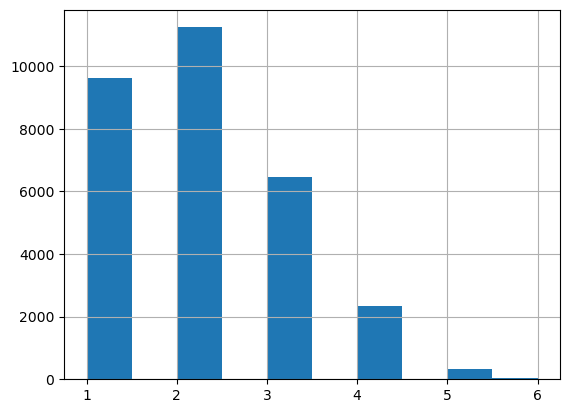

In [47]:
df['AgeBin'] = 0    #creating a column of 0
df.loc[((df['AGE'] >20) & (df['AGE'] < 30)) , 'AgeBin'] =1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] =2
df.loc[((df['AGE'] >=40) & (df['AGE'] < 50)) , 'AgeBin'] =3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] =4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] =5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 80)) , 'AgeBin'] =6
df.AgeBin.hist()

<AxesSubplot:>

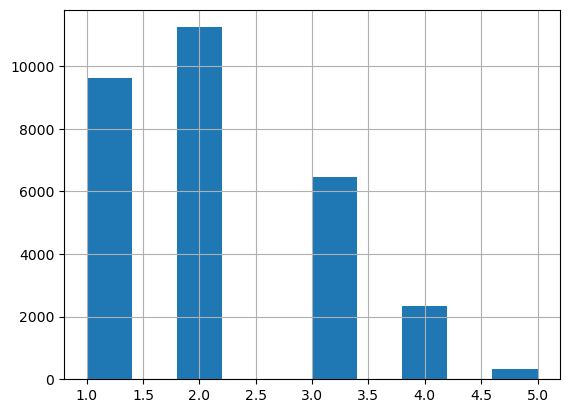

In [48]:
df.loc[(df['AgeBin']==6 ) ,'AgeBin'] =5
df.AgeBin.hist()

In [49]:
corr_2_cols('AgeBin' , 'def_pay')

def_pay,0,1,perc
AgeBin,,,
1,7421,2197,0.228426
2,8962,2276,0.202527
3,4979,1485,0.229734
4,1759,582,0.248612
5,243,96,0.283186


In [50]:
df['SE_AG']= 0
df.loc[((df.SEX==1) & (df.AgeBin==1)) , 'SE_AG'] =1   # man in 20's
df.loc[((df.SEX==1) & (df.AgeBin==2)) , 'SE_AG'] =2   # man in 30's
df.loc[((df.SEX==1) & (df.AgeBin==3)) , 'SE_AG'] =3   # man in 40's
df.loc[((df.SEX==1) & (df.AgeBin==4)) , 'SE_AG'] =4   # man in 50's
df.loc[((df.SEX==1) & (df.AgeBin==5)) , 'SE_AG'] =5   # man in 60's and above
df.loc[((df.SEX==1) & (df.AgeBin==1)) , 'SE_AG'] =6   # woman in 20's
df.loc[((df.SEX==1) & (df.AgeBin==2)) , 'SE_AG'] =7
df.loc[((df.SEX==1) & (df.AgeBin==3)) , 'SE_AG'] =8
df.loc[((df.SEX==1) & (df.AgeBin==4)) , 'SE_AG'] =9
df.loc[((df.SEX==1) & (df.AgeBin==5)) , 'SE_AG'] =10   # woman in 60's and above
corr_2_cols('SE_AG','def_pay')

def_pay,0,1,perc
SE_AG,,,
0,14349,3763,0.207763
6,2492,789,0.240475
7,3515,1050,0.230011
8,2080,691,0.249368
9,797,295,0.270147
10,131,48,0.268156


In [51]:
df['Proximity_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Proximity_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Proximity_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Proximity_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Proximity_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Proximity_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Proximity_6','Proximity_5','Proximity_4','Proximity_3','Proximity_2','Proximity_1','def_pay']].sample(20)

,Proximity_6,Proximity_5,Proximity_4,Proximity_3,Proximity_2,Proximity_1,def_pay
20110,0.996691,0.998636,0.998636,1.000000,1.000000,0.997105,1
29253,0.814240,0.179260,0.035640,0.064480,0.025900,0.051800,0
936,0.362244,0.377944,0.390911,0.402033,0.421289,0.471278,0
22988,0.663834,0.626874,0.680964,0.644282,0.657120,0.525868,0
10234,0.982700,0.975140,0.939000,0.919000,0.987440,0.974000,0
26384,0.572450,0.585355,0.552559,0.549227,0.492759,0.451718,0
173,1.065440,1.065440,1.057960,1.014180,1.014180,1.014180,1
23947,0.485495,0.394537,0.213563,0.172853,0.140337,0.025147,0
12769,0.287857,0.301971,0.275486,0.055900,0.025586,0.868114,0
13944,0.084789,0.139811,0.124444,0.131400,0.148522,0.150644,0


Always create a utilization variable for the datsets of the banking and credit cards data. It gives you the value of how much amount are you using from the credit limit.This proximity is the same.That along with your payment history is important(pay_1..).

utilizing more  unable to pay - high risk
utilizing low able to pay - useless customer for bank
 They need people in between. Sometimes to earn bank want you to pay only minimum and gain interest later.

You can also use library called dabl which gives all the necessary visualizations but the companies and industries does not allow to do this so you need to have the above fun defined and use them

# MODEL BUILDING

 Spliiting into training and test set

In [52]:
from sklearn.model_selection import train_test_split

x=df.drop(['def_pay','ID'],axis=1)
y=df['def_pay']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [53]:
x_train.dtypes

LIMIT_BAL      float64
SEX              int64
EDUCATION        int64
MARRIAGE         int64
AGE              int64
PAY_1            int64
PAY_2            int64
PAY_3            int64
PAY_4            int64
PAY_5            int64
PAY_6            int64
BILL_AMT1      float64
BILL_AMT2      float64
BILL_AMT3      float64
BILL_AMT4      float64
BILL_AMT5      float64
BILL_AMT6      float64
PAY_AMT1       float64
PAY_AMT2       float64
PAY_AMT3       float64
PAY_AMT4       float64
PAY_AMT5       float64
PAY_AMT6       float64
SE_MA            int64
SE_MA_2          int64
AgeBin           int64
SE_AG            int64
Proximity_6    float64
Proximity_5    float64
Proximity_4    float64
Proximity_3    float64
Proximity_2    float64
Proximity_1    float64
dtype: object

You can experiment with other test size as well.

Scaling the data

To keep the test data in the original format and not after handlin the class imbalance we have 1st used train test split and then handle class imbalance only of train data.

In [54]:
from sklearn.preprocessing import StandardScaler
#Std scaling is good for logistic and linear models,knn,k-means as they use distance formula 
# at the backend.Trr based algorithms can handle this on their own.
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.fit_transform(x_test)

In [55]:
df.shape

(30000, 35)

So we have added all the new created attributes to df already and will be using these in the further implementation

# 1. Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
LR= LogisticRegression(random_state=0)
LR.fit(x_train_std,y_train)
y_pred=LR.predict(x_test_std)





In [57]:
print('Accuracy:' , accuracy_score(y_pred,y_test))
print('Confusion matrix-train\n:' , confusion_matrix(y_test,y_pred))
cv_scores=cross_val_score(LR,x,y,cv=5)


Accuracy: 0.8134444444444444
Confusion matrix-train
: [[6694  315]
 [1364  627]]


E:\Softwares\Annaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Softwares\Annaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

looking at confusion matrix 1364 values for class 1 are predicted incorrectly where as only 627 are correctly predicted.So it is necessary to improve this.We see that the accuracy is 81.3% but its misclassification accuracy which we can see in confusion matrix.

In [58]:
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.67      0.31      0.43      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.63      0.66      9000
weighted avg       0.79      0.81      0.79      9000



For this problem we are more concerned with defaulters that is class 1 and we need to improve the f1-score for class 1.Recall is very bad for class 1.

In [59]:
print("Avg 5-fold cv scores:{}".format(round(np.mean(cv_scores),4)),
      "Standard deviation:{}".format(round(np.std(cv_scores),4)))

Avg 5-fold cv scores:0.7788 Standard deviation:0.0002


This model cannot be considered as good model and hence we need to deal with the class imbalance and try other models.

# Dealing with class imbalance

In [60]:
# creating a dataframe that has only training data to balance it 

df_train=x_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,SE_MA_2,AgeBin,SE_AG,Proximity_6,Proximity_5,Proximity_4,Proximity_3,Proximity_2,Proximity_1,def_pay
28314,200000.0,2,2,1,48,0,0,2,0,0,...,4,3,0,0.985110,0.975105,0.968455,0.945490,0.835310,0.889445,1
2659,50000.0,1,3,1,41,2,2,2,0,0,...,1,3,8,0.510400,0.446900,0.422440,0.431120,0.414780,0.476320,0
2094,20000.0,1,1,2,23,2,2,0,0,0,...,2,1,6,0.108100,0.126250,0.136650,0.173000,0.223300,0.246150,0
12683,200000.0,2,2,2,33,0,0,0,0,0,...,5,2,0,1.001935,1.001935,1.001935,0.932715,0.864105,0.764340,0
24471,130000.0,1,2,1,44,1,2,2,2,2,...,1,3,8,0.646992,0.642838,0.945992,0.939246,0.961554,0.959769,1
20052,80000.0,2,1,1,37,0,0,0,0,0,...,4,2,0,0.006225,-0.053387,-0.117500,-0.180163,-0.251875,-0.312362,0
679,30000.0,2,1,2,56,0,0,0,0,0,...,5,4,0,0.765867,0.765867,0.765867,0.765867,0.432900,0.032233,0
29745,20000.0,1,2,3,40,0,0,0,0,0,...,3,3,8,0.961000,1.000000,0.000000,0.100000,0.131350,0.192550,0
20741,50000.0,1,2,1,44,2,0,2,0,0,...,1,3,8,0.984400,0.976600,0.968800,0.981000,0.951540,0.970540,1
10394,230000.0,1,1,2,28,0,0,0,0,0,...,2,1,6,0.998583,0.994887,0.998583,0.998583,0.998583,0.998583,0


We do not need to use the standard scaled sets here as we are not going to try any distance based models.So while dealing with imbalance the normal train and test sets data are used.


CLASS IMBALANCE USING RESAMPLING/UPSAMPLING

In [61]:
from sklearn.utils import resample

#separate majority and minority class

df_majority=df_train[df_train.def_pay==0]
df_minority=df_train[df_train.def_pay==1]

print(df_majority.def_pay.count())
print("-------------")
print(df_minority.def_pay.count())
print("-------------")
print(df_train.def_pay.value_counts())

16355
-------------
4645
-------------
0    16355
1     4645
Name: def_pay, dtype: int64


In [62]:
#Upsampling minority class

df_minority_upsampled=resample(df_minority,
                              replace=True,  #sample with replacement
                              n_samples=16355,  # equal to majority class 
                              random_state=587 # reproducible results
                              )
# combining majority and upsampled minority class

df_upsampled=pd.concat([df_majority,df_minority_upsampled])

# checking the class counts

df_upsampled.def_pay.value_counts()
                               
                               

0    16355
1    16355
Name: def_pay, dtype: int64

It can be seen that class 1 values are in cresed to the values of class 0



CLASS IMBALANCE USING DOWNSAMPLING

In [63]:
#Downsampling minority class

df_majority_downsampled=resample(df_majority,
                              replace=False , #sample without replacement
                              n_samples=4645,  # equal to minority class 
                              random_state=587 # reproducible results
                              )
# combining majority and upsampled minority class

df_downsampled=pd.concat([df_majority_downsampled,df_minority])

# checking the class counts

df_downsampled.def_pay.value_counts()

0    4645
1    4645
Name: def_pay, dtype: int64

Here the majority class is downsampled equal to number of data in the minority class

CLASS IMBALANCE USING SMOTE

In [65]:
from imblearn.over_sampling import SMOTE


In [66]:
sm = SMOTE(random_state=42)
x_SMOTE,y_SMOTE= sm.fit_resample(x_train,y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())
print(y_SMOTE.value_counts())

32710
16355
0    16355
1    16355
Name: def_pay, dtype: int64


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [68]:
#normal training set
param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
             'criterion': ['entropy', 'gini'],
              'class_weight': ['balanced'],'n_jobs': [-1]} #use all the computational power you have
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(x_train, y_train) 
print(grid_forest.best_estimator_) 
print(grid_forest.best_score_)
forest_normal = grid_forest.best_estimator_

Wall time: 4min 42s
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=200, n_jobs=-1)
0.46827151978763243


# Implementing Random forest

In [69]:
forest_normal = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                                       criterion='entropy', max_depth=None, max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, 
                                       min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, 
                                       n_estimators=600, n_jobs=-1, oob_score=False, 
                                       random_state=None, verbose=0, warm_start = False)

# RF on upsampled data

In [70]:
y_upsampled=df_upsampled.def_pay
X_upsampled=df_upsampled.drop(['def_pay'], axis= 1)

In [79]:
# upsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
               'criterion': ['entropy', 'gini'],'n_jobs': [-1]}
acc_scorer = make_scorer (f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_upsampled, y_upsampled)

Wall time: 6min 25s


In [80]:
print(grid_forest.best_estimator_) 
print(grid_forest.best_score_) 
forest_upsampled = grid_forest.best_estimator_

RandomForestClassifier(n_estimators=400, n_jobs=-1)
0.9395750474303977


In [88]:
forest_upsampled = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                   max_depth=None, max_features='auto',max_leaf_nodes=None, min_impurity_decrease=0.0, 
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1, 
                   oob_score=False, random_state=None, verbose=0,warm_start=False)

# RF on downsampled data

In [89]:
y_downsampled= df_downsampled.def_pay
X_downsampled=df_downsampled.drop(['def_pay'], axis= 1)

In [94]:
# downsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
               'criterion': ['entropy', 'gini'],'n_jobs': [-1]}
acc_scorer = make_scorer (f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_downsampled, y_downsampled)


Wall time: 2min 36s


0    4645
1    4645
Name: def_pay, dtype: int64

In [96]:
print(grid_forest.best_estimator_) 
print(grid_forest.best_score_) 
forest_downsampled = grid_forest.best_estimator_

RandomForestClassifier(n_estimators=400, n_jobs=-1)
0.6880874520722647


In [99]:
forest_downsampled = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                   max_depth=None, max_features='auto',max_leaf_nodes=None, min_impurity_decrease=0.0, 
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1, 
                   oob_score=False, random_state=None, verbose=0,warm_start=False)

# RF on SMOTE data

In [100]:
#SMOTE training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
               'criterion': ['entropy', 'gini'],'n_jobs': [-1]}
acc_scorer = make_scorer (f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(x_SMOTE, y_SMOTE)
print(grid_forest.best_estimator_) 
print(grid_forest.best_score_) 
forest_SMOTE = grid_forest.best_estimator_

Wall time: 9min 7s
RandomForestClassifier(n_estimators=200, n_jobs=-1)
0.8477619925964358


In [102]:
forest_SMOTE = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                   max_depth=None, max_features='auto',max_leaf_nodes=None, min_impurity_decrease=0.0, 
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1, 
                   oob_score=False, random_state=None, verbose=0,warm_start=False)

# Adaboost implementation

In [154]:
# normal training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada=GridSearchCV(AdaBoostClassifier(), param_grid, scoring=acc_scorer, cv=5)
%time grid_ada= grid_ada.fit(x_train, y_train) 


Wall time: 8min 52s


In [156]:
print(grid_ada.best_estimator_)
print(grid_ada.best_score_) 
ada_normal=grid_ada.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=200)
0.467506786892244


In [114]:
#ada_normal= AdaBoostClassifier (algorithm= 'SAMME',
                                base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                                                                      max_depth=None, max_features=None, max_leaf_nodes=None, 
                                                                      min_impurity_decrease=0.0, 
                                                                      min_samples_leaf=1, min_samples_split=2,
                                                                      min_weight_fraction_leaf=0.0, random_state=None, 
                                                                      splitter='best'),
                                learning_rate=0.75,n_estimators=300, random_state=None)

In [157]:
ada_normal=AdaBoostClassifier(algorithm='SAMME', base_estimator=None, 
                                 learning_rate=1.0, n_estimators=200, random_state=None)

# Adaboost on upsampled data

In [118]:
# upsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada=GridSearchCV(AdaBoostClassifier(), param_grid, scoring=acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_upsampled, y_upsampled)


Wall time: 12min 46s


In [119]:
print (grid_ada.best_estimator_)
print (grid_ada.best_score_)
ada_upsampled=grid_ada.best_estimator_

AdaBoostClassifier(n_estimators=300)
0.6983284411847273


In [120]:
ada_upsampled=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, 
                                 learning_rate=1.0, n_estimators=300, random_state=None)

# Adaboost on downsampled data

In [158]:
# downsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada=GridSearchCV(AdaBoostClassifier(), param_grid, scoring=acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_downsampled, y_downsampled)


Wall time: 3min 41s


In [159]:
print (grid_ada.best_estimator_)
print (grid_ada.best_score_)
ada_downsampled=grid_ada.best_estimator_

AdaBoostClassifier(n_estimators=300)
0.6782269403414984


In [160]:
ada_downsampled=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, 
                                 learning_rate=1.0, n_estimators=300, random_state=None)

# Adaboost on SMOTE data

In [162]:
# SMOTE training set
param_grid = {'n_estimators': [200,300],
              'algorithm': [' SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada=GridSearchCV(AdaBoostClassifier(), param_grid, scoring=acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(x_SMOTE,y_SMOTE)
print (grid_ada.best_estimator_)
print (grid_ada.best_score_)
ada_SMOTE=grid_ada.best_estimator_

E:\Softwares\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Softwares\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Softwares\Annaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 483, in fit
    raise ValueError("algorithm %s is not supported" % self.algorithm)
ValueError: algorithm  SAMME is not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
E:\Softwares\Annaconda\lib\site

Wall time: 7min 54s
AdaBoostClassifier(n_estimators=200)
0.7724718134581321


In [163]:
ada_SMOTE=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, 
                            learning_rate=1.0, n_estimators=300, random_state=None)

# Gradient Boosting

In [135]:
#normal training set
from sklearn.ensemble import GradientBoostingClassifier
param_grid ={'n_estimators':[200,300],
            'learning_rate':[0.5,0.75,1.0]}
acc_scorer=make_scorer(f1_score)
grid_gbc=GridSearchCV (GradientBoostingClassifier(), param_grid, scoring=acc_scorer,cv=5)
%time grid_gbc=grid_gbc.fit (x_train, y_train)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_normal=grid_gbc.best_estimator_

Wall time: 8min 55s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=300)
0.45409455880364347


In [139]:
gbc_normal=GradientBoostingClassifier(criterion='friedman_mse',init=None,
                                      learning_rate=0.5, loss='deviance', max_depth=3, 
                                      max_features=None, max_leaf_nodes=None, 
                                      min_impurity_decrease=0.0,  
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0, n_estimators=200,
                                      random_state=None,subsample=1.0,
                                      verbose=0,warm_start=False)


# Gradient Boosting on Upsampled data

In [143]:
# Upsampled training set
param_grid ={'n_estimators':[200,300],
            'learning_rate':[0.5,0.75,1.0]}
acc_scorer=make_scorer(f1_score)
grid_gbc=GridSearchCV (GradientBoostingClassifier(), param_grid, scoring=acc_scorer,cv=5)
%time grid_gbc=grid_gbc.fit (X_upsampled, y_upsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_upsampled=grid_gbc.best_estimator_

Wall time: 13min 54s
GradientBoostingClassifier(learning_rate=1.0, n_estimators=300)
0.8418807947881886


In [145]:
gbc_upsampled=GradientBoostingClassifier(criterion='friedman_mse',init=None,
                                      learning_rate=0.5, loss='deviance', max_depth=3, 
                                      max_features=None, max_leaf_nodes=None, 
                                      min_impurity_decrease=0.0, 
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0, n_estimators=200,
                                      random_state=None,subsample=1.0,
                                      verbose=0,warm_start=False)


# Gradient Boosting on downsampled data

In [147]:
#downsampled training set
param_grid ={'n_estimators':[200,300],
            'learning_rate':[0.5,0.75,1.0]}
acc_scorer=make_scorer(f1_score)
grid_gbc=GridSearchCV (GradientBoostingClassifier(), param_grid, scoring=acc_scorer,cv=5)
%time grid_gbc=grid_gbc.fit (X_downsampled, y_downsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_downsampled=grid_gbc.best_estimator_

Wall time: 3min 56s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=300)
0.678131749737593


In [148]:
gbc_downsampled=GradientBoostingClassifier(criterion='friedman_mse',init=None,
                                      learning_rate=0.5, loss='deviance', max_depth=3, 
                                      max_features=None, max_leaf_nodes=None, 
                                      min_impurity_decrease=0.0,  
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0, n_estimators=200,
                                      random_state=None,subsample=1.0,
                                      verbose=0,warm_start=False)


# Gradient Boosting on SMOTE data

In [151]:
#normal training set
param_grid ={'n_estimators':[200,300],
            'learning_rate':[0.5,0.75,1.0]}
acc_scorer=make_scorer(f1_score)
grid_gbc=GridSearchCV (GradientBoostingClassifier(), param_grid, scoring=acc_scorer,cv=5)
%time grid_gbc=grid_gbc.fit (x_SMOTE, y_SMOTE)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_SMOTE=grid_gbc.best_estimator_

Wall time: 16min 23s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
0.7883784367502803


In [152]:
gbc_SMOTE=GradientBoostingClassifier(criterion='friedman_mse',init=None,
                                      learning_rate=0.5, loss='deviance', max_depth=3, 
                                      max_features=None, max_leaf_nodes=None, 
                                      min_impurity_decrease=0.0, 
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0, n_estimators=200,
                                      random_state=None,subsample=1.0,
                                      verbose=0,warm_start=False)


True positives and the false negatives are the models that we need to concentrate on the most considering the problem.
true positives= defaulters who were predicted correctly
false negatives =defaulters who could not be detected.
So in this case the true positives to false negatives ratio must be as high as possible to detect as much defaulters correctly as possible.

# Final predictions

In [173]:
#Normal sample training
%time forest_normal.fit(x_train, y_train) 
predictions=forest_normal.predict(x_test) 
print("________")
print ("fl score:{}". format (round (f1_score (y_true=y_test, y_pred=predictions),3)))
print ("Accuracy:{}". format (round (accuracy_score (y_true=y_test, y_pred=predictions),3))) 
print("_________")

TP=np.sum(np.logical_and(predictions == 1, y_test==1))
TN=np.sum(np.logical_and(predictions == 0, y_test==0))
FP=np.sum(np.logical_and(predictions == 1, y_test==0))
FN=np.sum(np.logical_and(predictions == 0, y_test==1))
pred = len(predictions)

print ('True Positives: {}'.format (TP))
print( 'False Positives: {}'. format (FP))
print ('True Negative: {}'. format (TN))
print( 'False Negative:{}'. format (FN))
print('precision: {}'.format (round (TP/ (TP+FP), 2)) )
print('Recall: {}'.format (round (TP / (FP+FN) ,3)))

Wall time: 10.4 s
________
fl score:0.452
Accuracy:0.813
_________
True Positives: 696
False Positives: 391
True Negative: 6618
False Negative:1295
precision: 0.64
Recall: 0.413


In [174]:
# Upsample training set

%time forest_upsampled.fit(X_upsampled, y_upsampled) 
predictions=forest_upsampled.predict(x_test) 
print("________")
print ("fl score:{}". format (round (f1_score (y_true=y_test, y_pred=predictions),3)))
print ("Accuracy:{}". format (round (accuracy_score (y_true=y_test, y_pred=predictions),3))) 
print("_________")

TP=np.sum(np.logical_and(predictions == 1, y_test==1))
TN=np.sum(np.logical_and(predictions == 0, y_test==0))
FP=np.sum(np.logical_and(predictions == 1, y_test==0))
FN=np.sum(np.logical_and(predictions == 0, y_test==1))
pred = len(predictions)

print ('True Positives: {}'.format (TP))
print( 'False Positives: {}'. format (FP))
print ('True Negative: {}'. format (TN))
print( 'False Negative:{}'. format (FN))
print('precision: {}'.format (round (TP/ (TP+FP), 2)) )
print('Recall: {}'.format (round (TP / (FP+FN) ,3)))

Wall time: 15.1 s
________
fl score:0.485
Accuracy:0.806
_________
True Positives: 821
False Positives: 574
True Negative: 6435
False Negative:1170
precision: 0.59
Recall: 0.471


In [175]:
# Downsample training set

%time forest_downsampled.fit(X_downsampled, y_downsampled) 
predictions=forest_downsampled.predict(x_test) 
print("________")
print ("fl score:{}". format (round (f1_score (y_true=y_test, y_pred=predictions),3)))
print ("Accuracy:{}". format (round (accuracy_score (y_true=y_test, y_pred=predictions),3))) 
print("_________")

TP=np.sum(np.logical_and(predictions == 1, y_test==1))
TN=np.sum(np.logical_and(predictions == 0, y_test==0))
FP=np.sum(np.logical_and(predictions == 1, y_test==0))
FN=np.sum(np.logical_and(predictions == 0, y_test==1))
pred = len(predictions)

print ('True Positives: {}'.format (TP))
print( 'False Positives: {}'. format (FP))
print ('True Negative: {}'. format (TN))
print( 'False Negative:{}'. format (FN))
print('precision: {}'.format (round (TP/ (TP+FP), 2)) )
print('Recall: {}'.format (round (TP / (FP+FN) ,3)))

Wall time: 5.41 s
________
fl score:0.52
Accuracy:0.736
_________
True Positives: 1287
False Positives: 1670
True Negative: 5339
False Negative:704
precision: 0.44
Recall: 0.542


In [176]:
# SMOTE training set

%time forest_SMOTE.fit(x_SMOTE, y_SMOTE) 
predictions=forest_SMOTE.predict(x_test) 
print("________")
print ("fl score:{}". format (round (f1_score (y_true=y_test, y_pred=predictions),3)))
print ("Accuracy:{}". format (round (accuracy_score (y_true=y_test, y_pred=predictions),3))) 
print("_________")

TP=np.sum(np.logical_and(predictions == 1, y_test==1))
TN=np.sum(np.logical_and(predictions == 0, y_test==0))
FP=np.sum(np.logical_and(predictions == 1, y_test==0))
FN=np.sum(np.logical_and(predictions == 0, y_test==1))
pred = len(predictions)

print ('True Positives: {}'.format (TP))
print( 'False Positives: {}'. format (FP))
print ('True Negative: {}'. format (TN))
print( 'False Negative:{}'. format (FN))
print('precision: {}'.format (round (TP/ (TP+FP), 2)) )
print('Recall: {}'.format (round (TP / (FP+FN) ,3)))

Wall time: 15.4 s
________
fl score:0.503
Accuracy:0.8
_________
True Positives: 913
False Positives: 724
True Negative: 6285
False Negative:1078
precision: 0.56
Recall: 0.507


If you check the support column of the test data when you see the classification report it will tell you how many class 1's are there in your test data and you are interested in those as you have to predict the defaulters correctly.

In these we are corncerned with true positives andfalse negatives which is basically recall.
Usually recall is more important than precision because we want a specific class to be better and recall is the measure that concentrates on a particular class but on the other hand precision is the measure that is a more generalized way of prediction.For eg: to detect whether a person has cancer or not it is extremely important to be able to detect all the persons who have cancer and that class is more important and thus in such places recall plays a vital role than precision and the decision of the model is then more dependent on the values of recall.

In this case from a recall point of view SMOTE is giving better results than compared to others. TP/FN ratio is best for downsampling.Accuracy we get is misclassification acc so its  not really much important for us. High recall for class 1 is important for us.
Downsampling is showing good here so sometimes the theory does not match that is why you should balance with all the 3 methods and then see which performs good in every model.
Do not ever 1st resample the data first split it into train test split and then only do these on training data else validation doesn't make sense
Check the cross validation accuracy to see if the model is robust and that is already done in gridsearch cv

# Conclusion

The credit card default prediction analysis on the dataset of 30,000 customers from a Taiwanese bank using various techniques to handle class imbalance was conducted. 

Additionally, downsampling was found to be effective in addressing class imbalance in the credit card default prediction analysis. By reducing the number of instances in the majority class, downsampling helped to improve the performance of the machine learning algorithms, resulting in better results in terms of recall, true positive rate, and overall accuracy. This finding suggests that downsampling can be a valuable technique in handling class imbalance in similar credit card default prediction projects.

Among the machine learning algorithms applied, Random Forest achieved the best performance with the highest recall and true positive rate and the lowest false positives, resulting in an accuracy of 73.6%. Data visualization and insights gathering were performed using Tableau.